In [71]:
import random
import numpy as np

demo_types = ['continuous', 'categorical', 'categorical', 'categorical']
demo_ync = [[], [], [], []]
demo_ysz = [[], [], [], []]
demo_onc = [[], [], [], []]
demo_osz = [[], [], [], []]
N = 1000

for i in range(N):
    age = [20, 20, 50, 50] #random.randint(15,65)
    sex = random.randint(0,1)
    race = random.randint(0,1)
    diag = [3, 0, 3, 0] #random.randint(0,1)*3 # 0 SZP or 3 NC/Relative
    for a,d,demo in zip(age, diag, [demo_ync, demo_ysz, demo_onc, demo_osz]):
        demo[0].append(a)
        demo[1].append(sex)
        demo[2].append(race)
        demo[3].append(d)

fc = {'Baltimore': [], 'Chicago': [], 'Dallas': [], 'Detroit': [], 'Hartford': []}

for demo in [demo_ync, demo_ysz, demo_onc, demo_osz]:
    for i in range(len(demo)):
        demo[i] = np.array(demo[i])

print('Done')

Done


In [73]:
from demovae import DemoVAE

for loc in fc.keys():
    path = f'/home/anton/Documents/Tulane/Research/FederatedVAE/BSNIP_Models/{loc}.pkl'
    
    vae = DemoVAE(pperiod=100, use_cuda=True, nepochs=5000, latent_dim=30, weight_decay=0, lr=5e-5, loss_rec_mult=500, loss_pred_mult=.01)
    vae.load(path)
    fc[loc] = {}
    for demo, key in zip([demo_ync, demo_ysz, demo_onc, demo_osz], ['ync', 'ysz', 'onc', 'osz']):
        fc[loc][key] = vae.transform(N, demo, demo_types)
        print(fc[loc][key].shape)

(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)


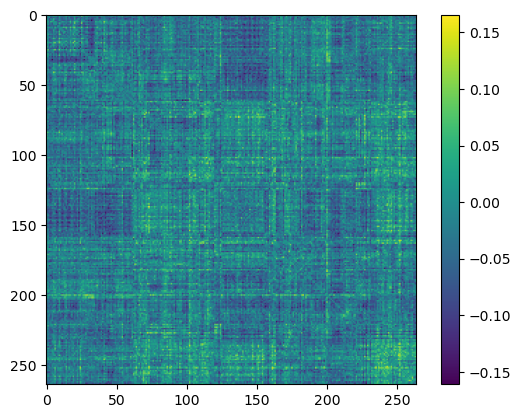

In [80]:
import matplotlib.pyplot as plt

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

site = 'Hartford'

A = vec2mat(np.mean(fc[site]['ync'], axis=0))
B = vec2mat(np.mean(fc[site]['ysz'], axis=0))
C = vec2mat(np.mean(fc[site]['onc'], axis=0))
D = vec2mat(np.mean(fc[site]['osz'], axis=0))

plt.imshow(B-A)
plt.colorbar()

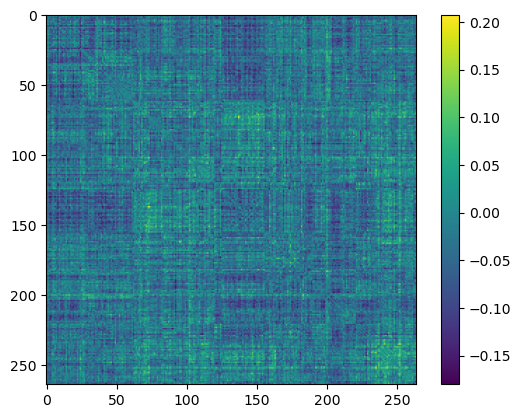

In [79]:
plt.imshow(D-C)
plt.colorbar()

In [18]:
# Get the true site differences

ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')


Complete


In [81]:
site = 'Hartford'

g1nc = []
g1sz = []
g2nc = []
g2sz = []
allnc = []
allsz = []

import pickle
import numpy as np

diag_map = {'SZP': 0, 'BPP': 1, 'SADBPP': 2, 'SADDEPP': 2, 'NC': 3, 'SADDEPR': 3, 'SADBPR': 3, 'BPR': 3, 'SZR': 3} 

bsnipdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/BSNIP/'
bsnip = pickle.load(open(f'{bsnipdir}/demographics.pkl', 'rb'))

a,b = np.triu_indices(264,1)

for sub in bsnip['Age_cal']:
    parts = sub.split('.')
    if parts[0] != site:
        continue
    diag = bsnip['DXGROUP_1'][sub]
    diag = diag_map[diag]
    if diag != 0 and diag != 3:
        continue
    diag = int(diag == 3)
    p = np.load(f'{bsnipdir}/fc/{sub}_task-unk_fc.npy')
    p = remap(vec2mat(p))[a,b]
    if diag == 0:
        allsz.append(p)
    else:
        allnc.append(p)
    age = bsnip['Age_cal'][sub]
    sex = bsnip['sex'][sub] == 's1.0'
    if sex: #age < 30:
        if diag == 0:
            g1sz.append(p)
        else:
            g1nc.append(p)
    else: #elif age > 40:
        if diag == 0:
            g2sz.append(p)
        else:
            g2nc.append(p)

g1nc = np.mean(np.stack(g1nc), axis=0)
g1sz = np.mean(np.stack(g1sz), axis=0)
g2nc = np.mean(np.stack(g2nc), axis=0)
g2sz = np.mean(np.stack(g2sz), axis=0)
allnc = np.mean(np.stack(allnc), axis=0)
allsz = np.mean(np.stack(allsz), axis=0)

print('Done')

Done


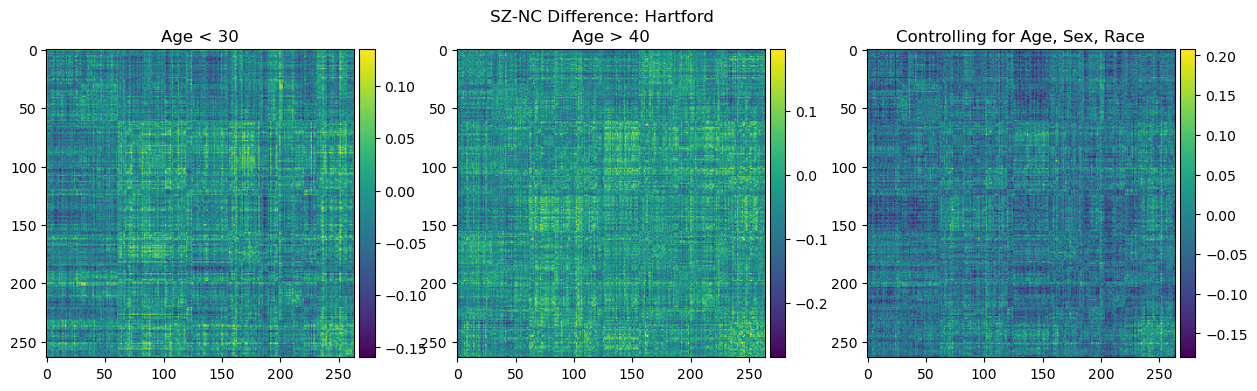

In [82]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,3,figsize=(15,4))

im0 = ax[0].imshow(vec2mat(g1sz-g1nc))
ax[0].set_title('Age < 30')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(vec2mat(g2sz-g2nc))
ax[1].set_title('Age > 40')

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[2].imshow(D-C)
ax[2].set_title('Controlling for Age, Sex, Race')

divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

fig.suptitle('SZ-NC Difference: ' + site)
fig.show()

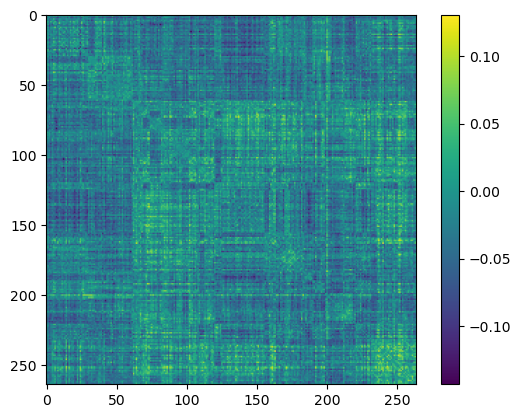

In [83]:
plt.imshow(vec2mat(allsz-allnc))
plt.colorbar()